# WeatherPy

---------------

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    unit = "metric"
    #city_url =url + "&q=" + city + "&appid=" + weather_api_key
    city_url =url + "&q=" + city + "&units=" + unit + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | usinsk
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | pallasovka
Processing Record 6 of Set 1 | teshi old town
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | glace bay
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | pisco
Processing Record 11 of Set 1 | khabarovsk
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | egilsstadir
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | muynoq
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | pandan
Proc

City not found. Skipping...
Processing Record 36 of Set 4 | oranjemund
Processing Record 37 of Set 4 | ta`u
Processing Record 38 of Set 4 | mogocha
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | holualoa
Processing Record 41 of Set 4 | khairpur nathan shah
Processing Record 42 of Set 4 | ulsteinvik
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | alotau
City not found. Skipping...
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | misratah
Processing Record 48 of Set 4 | la'ie
Processing Record 49 of Set 4 | kangiwa
Processing Record 0 of Set 5 | chimoio
Processing Record 1 of Set 5 | kapa'a
Processing Record 2 of Set 5 | zouerate
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | alice springs
Processing Record 5 of Set 5 | jiuquan
Processing Record 6 of Set 5 | mili
Processing Record 7 of Set 5 | chernyshevskiy
Processing Record 8 of 

Processing Record 27 of Set 8 | huinca renanco
Processing Record 28 of Set 8 | sarangani
Processing Record 29 of Set 8 | gaillon
Processing Record 30 of Set 8 | buka
Processing Record 31 of Set 8 | espargos
City not found. Skipping...
Processing Record 32 of Set 8 | conduaga
Processing Record 33 of Set 8 | al bayda'
Processing Record 34 of Set 8 | abaete
Processing Record 35 of Set 8 | luau
Processing Record 36 of Set 8 | vorgashor
Processing Record 37 of Set 8 | nora
Processing Record 38 of Set 8 | cockburn town
Processing Record 39 of Set 8 | yantai
Processing Record 40 of Set 8 | weno
Processing Record 41 of Set 8 | palmer
Processing Record 42 of Set 8 | karratha
Processing Record 43 of Set 8 | changping
Processing Record 44 of Set 8 | mahina
Processing Record 45 of Set 8 | kovdor
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | madang
Processing Record 48 of Set 8 | mangai
Processing Record 49 of Set 8 | fale old settlement
Processing Record 0 of Set 9 | impf

Processing Record 15 of Set 12 | kingscliff
Processing Record 16 of Set 12 | vilcun
Processing Record 17 of Set 12 | minas de marcona
Processing Record 18 of Set 12 | sars
Processing Record 19 of Set 12 | rehoboth
Processing Record 20 of Set 12 | lushun
Processing Record 21 of Set 12 | barra do bugres
Processing Record 22 of Set 12 | diu
Processing Record 23 of Set 12 | leicester
Processing Record 24 of Set 12 | brookings
Processing Record 25 of Set 12 | bojnurd
Processing Record 26 of Set 12 | razdol'noye
Processing Record 27 of Set 12 | keetmanshoop
Processing Record 28 of Set 12 | estevan
Processing Record 29 of Set 12 | saudarkrokur
Processing Record 30 of Set 12 | banff
Processing Record 31 of Set 12 | novyy urgal
Processing Record 32 of Set 12 | sept-iles
Processing Record 33 of Set 12 | pizarro
Processing Record 34 of Set 12 | fort meade
Processing Record 35 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 36 of Set 12 | fuerte olimpo
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,26.72,81,75,1.88,YE,1696980046
1,usinsk,65.9939,57.5281,2.26,76,100,10.73,RU,1696979979
2,yellowknife,62.4560,-114.3525,14.67,76,75,3.09,CA,1696980545
3,san antonio de pale,-1.4014,5.6325,25.65,84,96,5.67,GQ,1696980007
4,pallasovka,50.0500,46.8833,7.07,57,100,4.89,RU,1696980546


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,26.72,81,75,1.88,YE,1696980046
1,usinsk,65.9939,57.5281,2.26,76,100,10.73,RU,1696979979
2,yellowknife,62.4560,-114.3525,14.67,76,75,3.09,CA,1696980545
3,san antonio de pale,-1.4014,5.6325,25.65,84,96,5.67,GQ,1696980007
4,pallasovka,50.0500,46.8833,7.07,57,100,4.89,RU,1696980546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

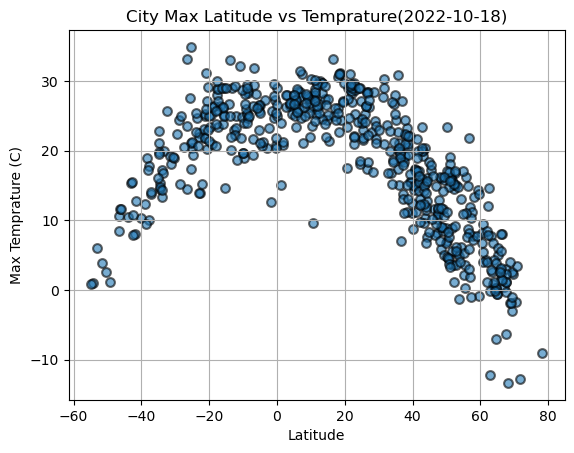

In [8]:
#Create a scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind="scatter", s=40, alpha=0.6, edgecolors='black', linewidths=1.5)

# Add grid lines
plt.grid(True)

#Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (C)')
plt.title('City Max Latitude vs Temprature(2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

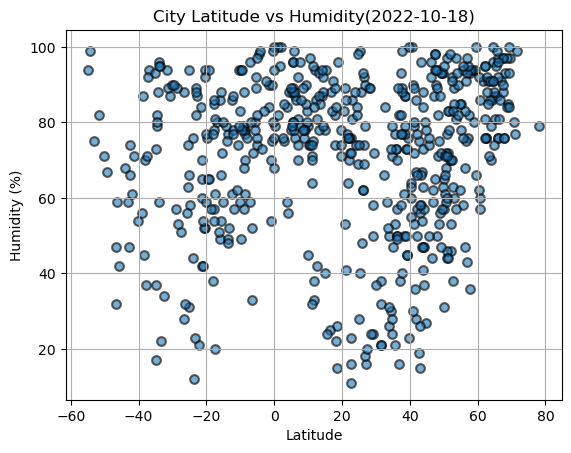

In [9]:
#Create a scatter plot for latitude vs. Humidity
city_data_df.plot('Lat','Humidity',kind="scatter", s=40, alpha=0.6, edgecolors='black', linewidths=1.5)

# Add grid lines
plt.grid(True)

#Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity(2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

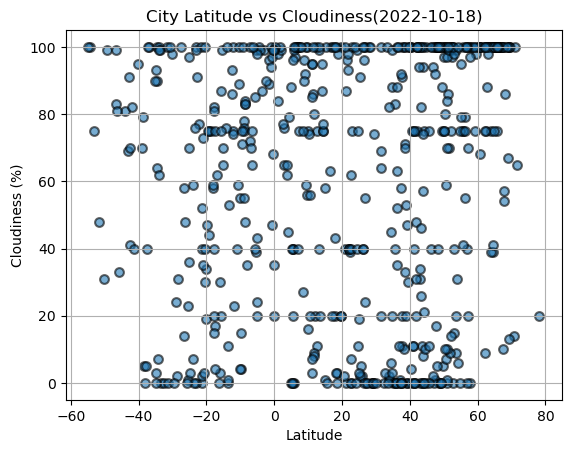

In [10]:
#Create a scatter plot for latitude vs. Cloudiness
city_data_df.plot('Lat','Cloudiness',kind="scatter", s=40, alpha=0.6, edgecolors='black', linewidths=1.5)

# Add grid lines
plt.grid(True)

#Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness(2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

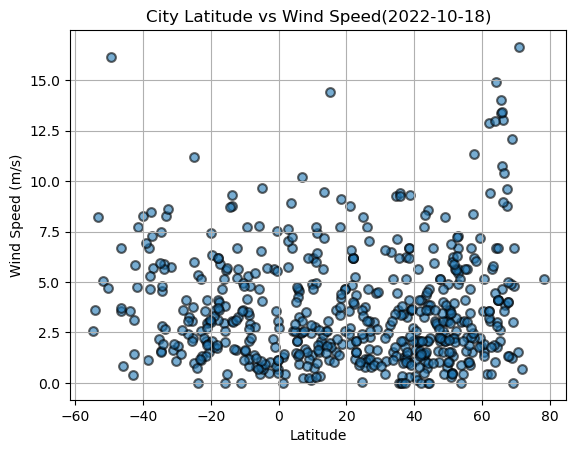

In [11]:
#Create a scatter plot for latitude vs. Wind Speed
city_data_df.plot('Lat','Wind Speed',kind="scatter", s=40, alpha=0.6, edgecolors='black', linewidths=1.5)

# Add grid lines
plt.grid(True)

#Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed(2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y, xlabel='X-axis', ylabel='Y-axis'):

    #Initialize the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    #Create the regression line using the slope and intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    print(f"The r-value is:: {rvalue}")
    
    #Create a scatter plot of the data points
    plt.scatter(x, y, label='Data Points')
    
    # Plot the regression line
    plt.plot(x, regress_values, color='red', label='Regression Line')
    #plt.annotate(line_eq, (0,15), fontsize=15, color='red')
    plt.annotate(line_eq, (max(x),max(y)), fontsize=15, color='red')

    # Add labels and a title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

In [13]:
#DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.sample(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
138,marang,5.2056,103.2059,24.96,88,40,1.49,MY,1696980570
541,leicester,52.6386,-1.1317,17.12,83,100,7.21,GB,1696980461
104,dwarka,22.2394,68.9678,26.99,72,39,3.89,IN,1696980127
251,vilyuysk,63.7553,121.6247,6.77,91,100,4.47,RU,1696980111
490,turpan,42.9333,89.1667,20.39,26,100,0.50,CN,1696980649


In [14]:
#DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]
#Display Sample data
southern_hemi_df.sample(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
477,port shepstone,-30.7414,30.4550,19.04,87,100,1.91,ZA,1696980646
421,cobija,-11.0267,-68.7692,32.10,62,40,0.00,BO,1696980633
62,tamandare,-8.7597,-35.1047,25.24,78,83,3.36,BR,1696980556
9,pisco,-13.7000,-76.2167,20.03,77,0,8.75,PE,1696980547
385,puerto iguazu,-25.5991,-54.5736,27.62,56,0,3.09,AR,1696980623


#  Temperature vs. Latitude Linear Regression Plot

y = -0.44x + 32.88
The r-value is:: -0.8613281646452886


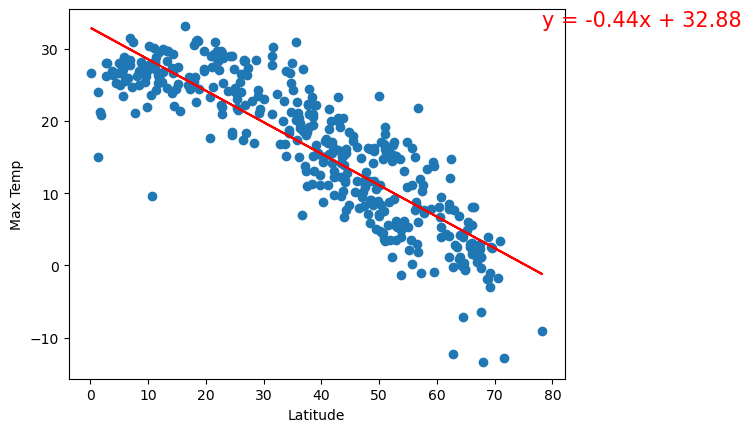

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Max Temp'],
                       xlabel='Latitude',
                       ylabel='Max Temp')

y = 0.36x + 28.98
The r-value is:: 0.7293458688088744


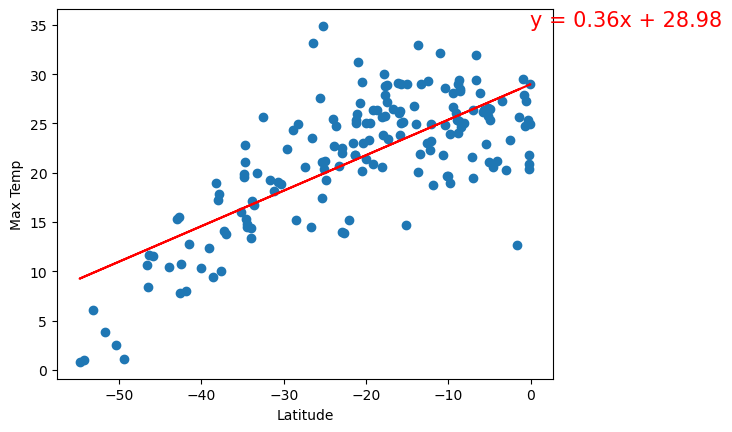

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Max Temp'],
                       xlabel='Latitude',
                       ylabel='Max Temp')

# **Discussion about the linear relationship:Temperature vs. Latitude Linear Regression Plot** 

#*Analysis for Linear regression on Northern Hemisphere*

y = -0.43x + 33.9
The r-value is:: -0.8214

For this regression model:
•0.43 is the slope of the regression line.
•33.9 is the intercept.

r-value: -0.8214 indicates a strong negative linear relationship between x and y.
•Negative sign indicates an inverse relationship, means as x increases, y tends to decrease, and as y increases, x tends to decrease.
•An r-value indicates the strength of the relationship.
 R-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.8214) indicates a moderately strong value. 

#*Analysis for Linear regression on Southern Hemisphere*

y = 0.45x + 30.72
The r-value is: 0.75978
    
•0.45 is the slope of the regression line.

•30.72 is the intercept.

r-value: 0.75978 indicates a strong linear relationship between x and y.
•An r-value indicates the strength of the relationship.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0. 75978) indicates a moderately strong value.
• The relationship is positive, meaning that as x increases, y tends to increase, and as x decreases, y tends to decrease, consistent with the positive slope.


# Humidity vs. Latitude Linear Regression Plot

y = 0.12x + 67.4
The r-value is:: 0.10497115843148414


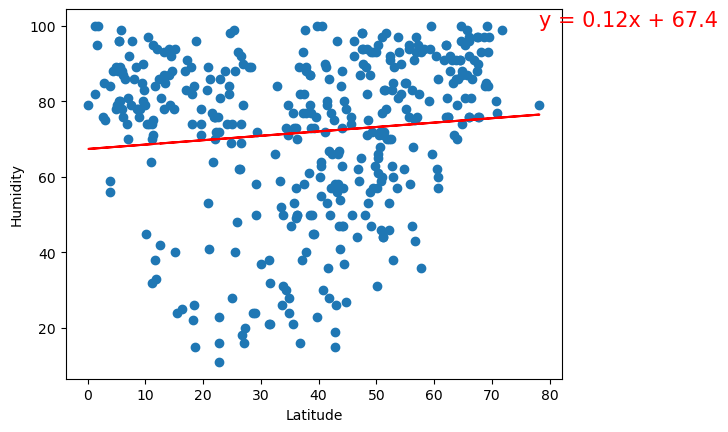

In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Humidity'],
                       xlabel='Latitude',
                       ylabel='Humidity')

y = 0.28x + 75.61
The r-value is:: 0.1894385979092899


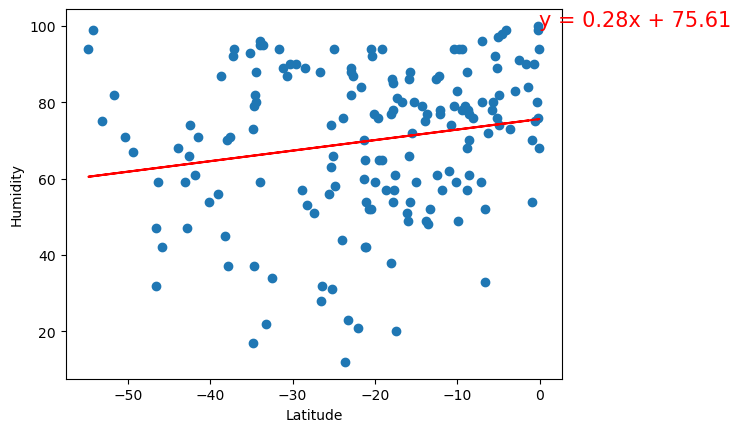

In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Humidity'],
                       xlabel='Latitude',
                       ylabel='Humidity')

# **Discussion about the linear relationship:Humidity vs. Latitude Linear Regression Plot**

#*Analysis for Linear regression on Northern Hemisphere*

y = 0.14x + 64.75
The r-value is:: 0.121246798932242

For this regression model:
•0.14 is the slope of the regression line.
•64.75 is the intercept.

r-value: 0.12124 indicates a very weak positive linear relationship between x and y.
•An r-value indicates the strength of the relationship.
•positive sign indicates a direct relationship, means as x increases, y tends to increase, and as y decrease, x tends to decrease.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.12124) is very close to 0,
indicating that there is almost no linear relationship between x and y.

#*Analysis for Linear regression on Southern Hemisphere*

y = 0.0x + 70.54
The r-value is:: 0.000233093885446
    
•0 is the slope of the regression line.

•70.54 is the intercept.

r-value: 0.000233093885446 indicatesno linear relationship between x and y.
•An r-value indicates the strength of the relationship.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.000233093885446) is very close to 0.
it indicates that there is no linear relationship between x and y. 
In other words, the value of y does not change as x changes since the slope is zero.

# Cloudiness vs. Latitude Linear Regression Plot

y = 0.28x + 49.16
The r-value is:: 0.13608344570792674


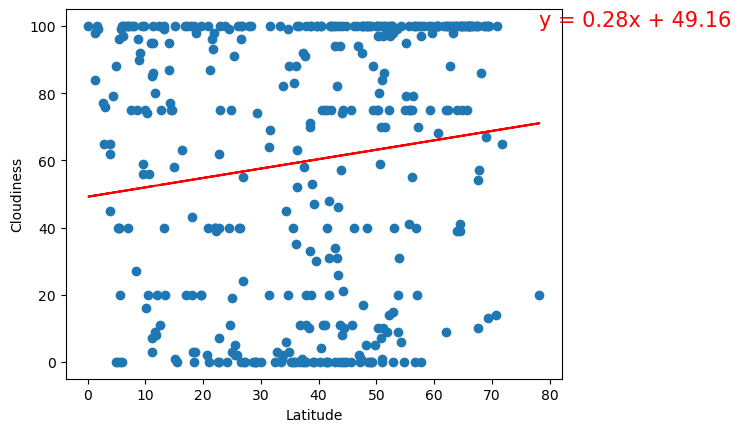

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Cloudiness'],
                       xlabel='Latitude',
                       ylabel='Cloudiness')

y = 0.18x + 62.31
The r-value is:: 0.06851908986978629


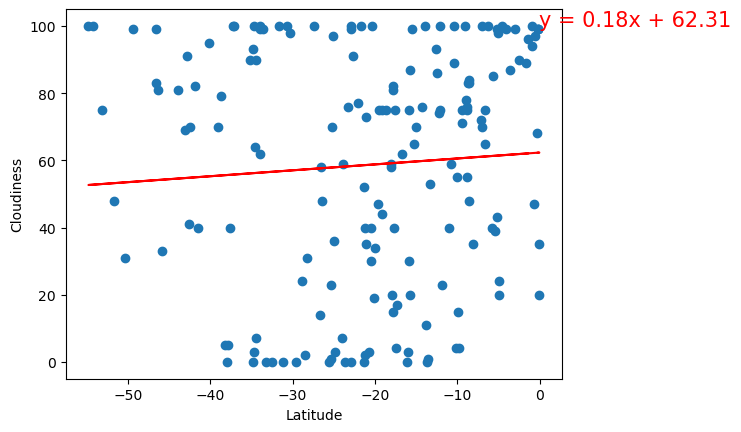

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Cloudiness'],
                       xlabel='Latitude',
                       ylabel='Cloudiness')

# **Discussion about the linear relationship:Cloudiness vs. Latitude Linear Regression Plot**
#*Analysis for Linear regression on Northern Hemisphere*

y = 0.34x + 46.2
The r-value is:: 0.15670864581171629

For this regression model:
•0.34 is the slope of the regression line.
•46.2 is the intercept.

r-value: 0.15670864581171629 indicates a very weak positive linear relationship between x and y.
•An r-value indicates the strength of the relationship.
•positive sign indicates a direct relationship, means as x increases, y tends to increase, and as y decrease, x tends to decrease.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.156708645) is very close to 0,
indicating that there is almost no linear relationship between x and y.

#*Analysis for Linear regression on Southern Hemisphere*

y = 0.12x + 53.38
The r-value is:: 0.043325635799
    
•0.12 is the slope of the regression line.

•53.38 is the intercept.

r-value: 0.043325635799 indicates no linear relationship between x and y.
•An r-value indicates the strength of the relationship.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.043325635799) is very close to 0.
it indicates that there is no linear relationship between x and y. 
In other words, the value of y does not change as x changes since the slope is zero.

# Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 2.71
The r-value is:: 0.15620516038922888


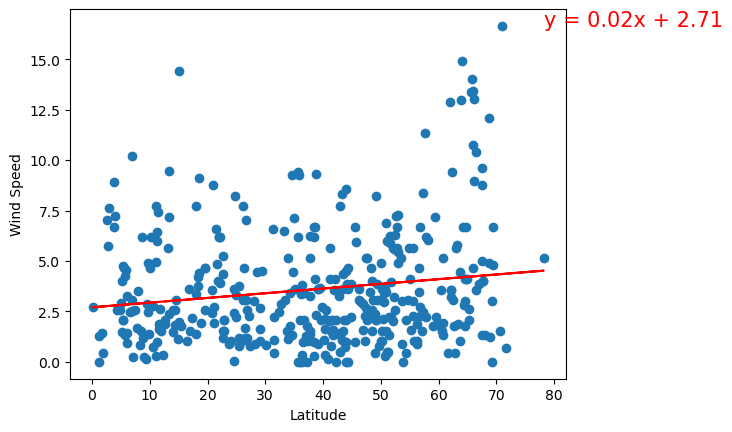

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'],
                       northern_hemi_df['Wind Speed'],
                       xlabel='Latitude',
                       ylabel='Wind Speed')

y = -0.05x + 2.75
The r-value is:: -0.24259054350154696


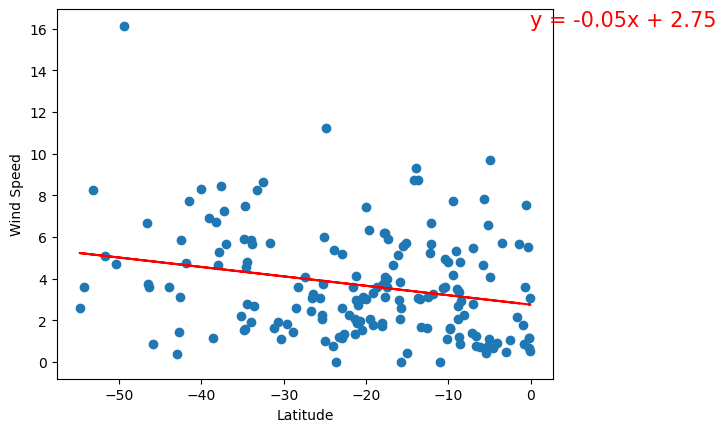

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'],
                       southern_hemi_df['Wind Speed'],
                       xlabel='Latitude',
                       ylabel='Wind Speed')

# **Discussion about the linear relationship:Wind Speed vs. Latitude Linear Regression Plot** 
#*Analysis for Linear regression on Northern Hemisphere*

y = 0.02x + 2.81
The r-value is:: 0.1793032214

For this regression model:
•0.02 is the slope of the regression line.
•2.81 is the intercept.

r-value: 0.1793032214 indicates a very weak positive linear relationship between x and y.
•An r-value indicates the strength of the relationship.
•positive sign indicates a direct relationship, means as x increases, y tends to increase, and as y decrease, x tends to decrease.
 r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(0.1793032214) is very close to 0,
indicating that there is almost no linear relationship between x and y.

#*Analysis for Linear regression on Southern Hemisphere*

y = -0.04x + 3.5
The r-value is:: -0.17965268262945483
    
•-0.04 is the slope of the regression line.

•3.5 is the intercept.

r-value: -0.17965268262945483 indicates a very weak negative linear relationship between x and y.
•An r-value indicates the strength of the relationship.
r-value closer to 1 or −1 would indicate a stronger linear relationship.in this case, r-value(-0.17965268262945483) is very close to 0.
it indicates that there is very weak linear relationship between x and y. 
While there is a negative slope, indicating that as x increases,y tends to decrease,
the relationship is so weak that it may not be practically useful for making predictions
or drawing strong conclusions.